In [1]:
import sys
sys.path.insert(0, "/home/brandm/Documents/Tesis/conflictmodel/conflictmodel")

In [2]:
import csv
import random
import pickle

import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
import numpy as np

import modified_script as cm

import pandas as pd


In [17]:
L = 5
numbers = 1000
density = 0.3

### Run simulation

In [18]:
simulation = cm.Simulation(L, numbers, density)

In [19]:
df, grid, matrix = simulation.run_simulation(land_combat = False)

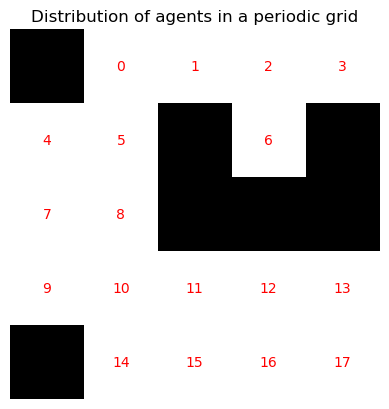

In [20]:
plt.imshow(grid, cmap='Greys', interpolation='nearest')

# Get the shape of the array to determine the number of rows and columns
rows, cols = grid.shape

# Find indices of zeros in the array
zero_indices = np.argwhere(grid == 0)

# Set the xticks and yticks with labels for values equal to 0
plt.xticks(range(cols), range(cols))
plt.yticks(range(rows), range(rows))

# Loop through the zero indices and set the corresponding tick labels to '0 to N'
n = 0
for idx in zero_indices:
    x, y = idx[1], idx[0]
    plt.text(x, y, n, color='red', ha='center', va='center')
    n +=1
# Remove axis labels
plt.axis('off')

plt.title('Distribution of agents in a periodic grid')

# Show the plot
plt.show()

In [21]:
N = L*L-int(density * L*L)

In [22]:
N

18

In [23]:
df

,Attackers,Defenders,Activity,Status,TCL,ACL,Active,Target,0,1,...,8,9,10,11,12,13,14,15,16,17
0,[2],[10],0.000000e+00,1,106.500,79.000,2,10,495.000,388.000,...,402.000,436.000,209.500,376.000,433.000,335.000,369.000,362.000,355.000,368.000
1,[0],[10],0.000000e+00,1,123.750,52.375,0,10,442.625,388.000,...,402.000,436.000,85.750,376.000,433.000,335.000,369.000,362.000,355.000,368.000
2,[15],[10],6.920415e-04,0,85.750,0.000,15,10,442.625,388.000,...,402.000,436.000,0.000,376.000,433.000,335.000,369.000,447.750,355.000,368.000
3,[2],[3],0.000000e+00,1,86.750,83.250,2,3,442.625,388.000,...,402.000,436.000,0.000,376.000,433.000,335.000,369.000,447.750,355.000,368.000
4,NaN,NaN,0.000000e+00,0,0.000,0.000,3,NaN,442.625,388.000,...,402.000,436.000,0.000,376.000,433.000,335.000,369.000,447.750,355.000,368.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,[15],[17],6.920415e-04,1,4.883,4.880,15,17,25.576,35.993,...,27.782,20.000,22.812,37.493,26.413,27.753,39.663,14.653,39.219,14.638
5996,"[3, 7]","[0, 5, 8, 9, 12]",7.612457e-03,1,50.152,20.345,7,8,22.423,35.993,...,10.661,11.372,22.812,37.493,15.019,27.753,39.663,14.653,39.219,14.638
5997,"[3, 6]","[0, 16]",6.338644e-17,0,39.219,0.000,6,16,22.423,35.993,...,10.661,11.372,22.812,37.493,15.019,27.753,39.663,14.653,0.000,14.638
5998,"[3, 13]","[0, 5, 9, 10, 12]",5.536332e-03,1,39.900,20.005,13,10,14.597,35.993,...,10.661,5.702,11.437,37.493,7.530,24.274,39.663,14.653,0.000,14.638


### Data saving

In [ ]:
import os

# Create the new folder inside the outputfolder
folder_name = f"population-{N}"
folder_path = os.path.join('outputfolder', folder_name)
os.makedirs(folder_path, exist_ok=True)

# Save the data in the new folder
file_name = f"simulation_data_{numbers}.pkl"
file_path = os.path.join(folder_path, file_name)
with open(file_path, 'wb') as file:
    pickle.dump(df, file)

In [ ]:
# Save the matrixes in the same folder
file_path = os.path.join(folder_path, f'matrix_list_{numbers}.pkl')
with open(file_path, 'wb') as file:
    pickle.dump(matrixes, file)

## Data Analysis

### Activity and total Resources

In [ ]:
# Load self.data from the pickle file
with open('outputfolder/population-138/simulation_data_1000.pkl', 'rb') as file:
    df = pickle.load(file)

In [ ]:
# Load self.matrix_list from the pickle file
with open('outputfolder/population-138/grid.pkl', 'rb') as file:
    grid = pickle.load(file)

In [ ]:
df

In [24]:
x1 = np.arange(0,len(df[0]),1)

In [25]:
total_resources = df.iloc[:, 8:].sum(axis = 1)


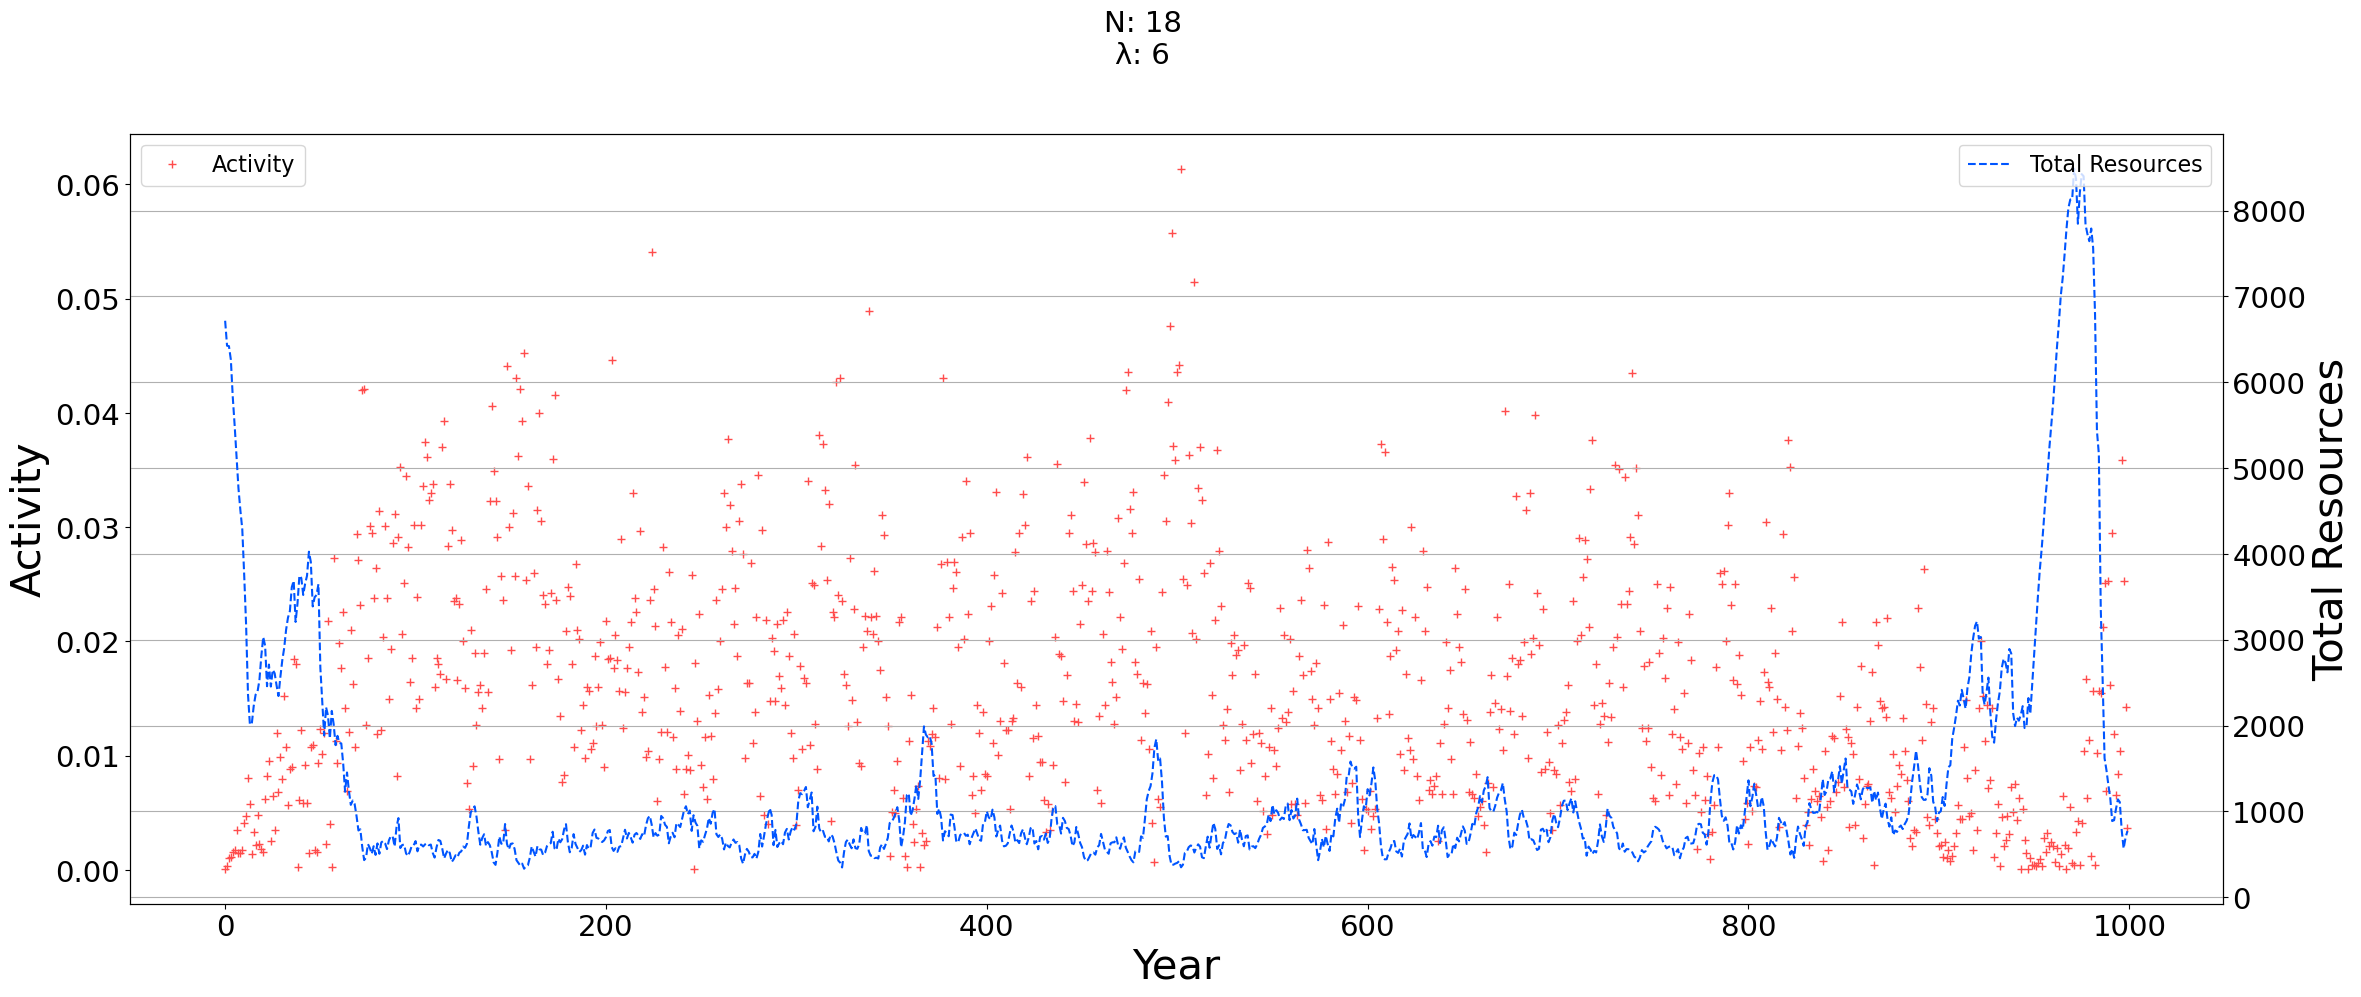

In [26]:
# Calculate the range of years based on the length of x1
years = range(x1[0]//(N//3), (x1[-1]//(N//3)) + 1)

# Group the data by 33-year intervals and calculate the mean
df_grouped = df["Activity"].groupby((x1//(N//3))).mean()
df_grouped2 = total_resources.groupby((x1//(N//3))).mean()

fig, ax1 = plt.subplots(figsize=(27, 10), facecolor='white')
ax2 = ax1.twinx()

ax1.set_ylabel("Activity", fontsize=30)
ax2.set_ylabel("Total Resources", fontsize=30)
ax1.set_xlabel("Year", fontsize=30)

ax1.tick_params(axis='both', labelsize=21)
ax2.tick_params(axis='both', labelsize=21)

ax1.plot(years, df_grouped, linestyle=" ", marker="+", color="#FF4C4C", label='Activity')
ax2.plot(years, df_grouped2, linestyle="--", color="#0055FF", label='Total Resources')

# Create the legend
ax1.legend(loc='upper left', fontsize=16)
ax2.legend(loc='upper right', fontsize=16)

# Add parameter information as a text annotation
params_info = f"N: {N}\nλ: {N//3}"
plt.text(0.5, 0.95, params_info, transform=fig.transFigure, fontsize=21, ha='center')

plt.grid(True)
plt.show()
plt.close()


## Conflict Sizes

In [27]:
filtered_df = df[df["Status"] == 1]

In [28]:
filtered_df.loc[:, 'Attackers_length'] = filtered_df['Attackers'].apply(len)
filtered_df.loc[:, 'Defenders_length'] = filtered_df['Defenders'].apply(len)


/tmp/ipykernel_62/3896811291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'Attackers_length'] = filtered_df['Attackers'].apply(len)
/tmp/ipykernel_62/3896811291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'Defenders_length'] = filtered_df['Defenders'].apply(len)


### Defence coalition ($\tau$)

In [29]:
# Extract the values of "Tau" from the filtered dataframe
tau_values = filtered_df['Defenders_length']

# Count the occurrences of each value in the DataFrame column
value_counts = tau_values.value_counts()

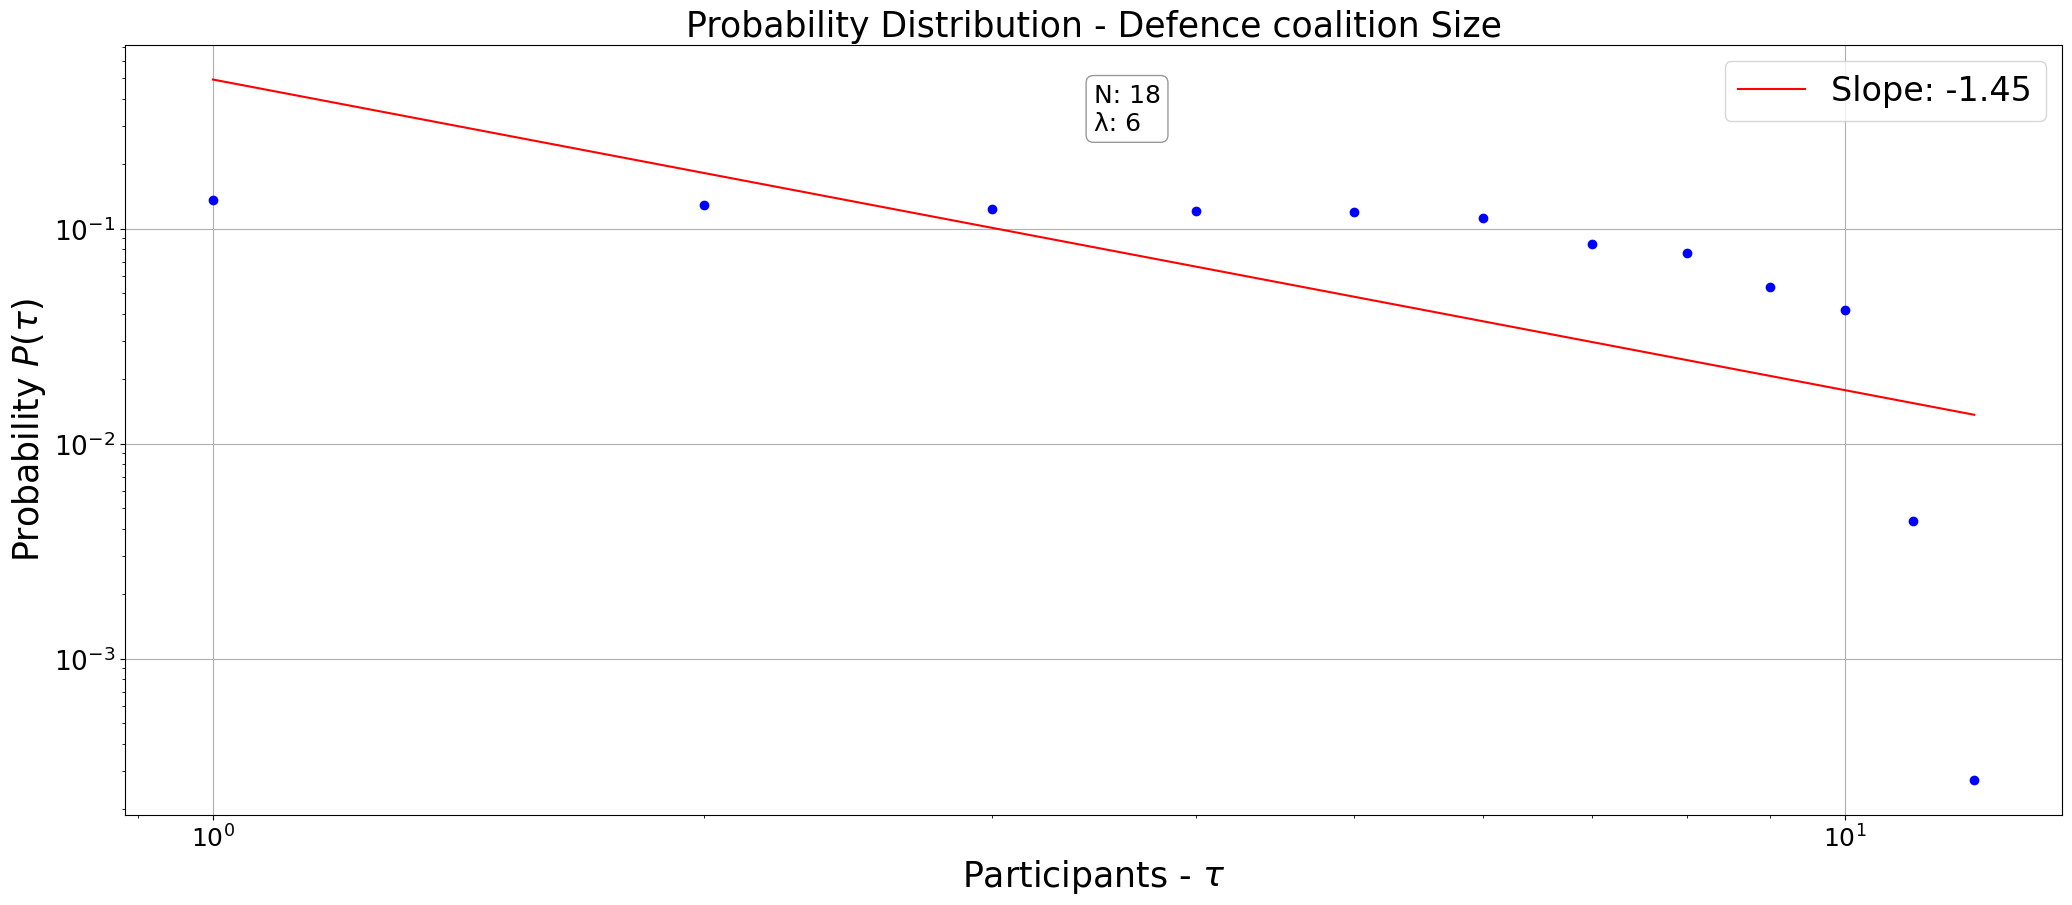

In [30]:
# Calculate the probability distribution
prob_distribution = value_counts / len(tau_values)

# Sort the values in ascending order
sorted_values = np.sort(value_counts.index)

# Increase the size of the plot
plt.figure(figsize=(25, 10), facecolor='white')  # Adjust the values (width, height) as desired


# Plot the probability distribution on a log-log scale
plt.loglog(sorted_values, prob_distribution, marker='o', linestyle='', color='blue')

# Perform log-log transformation
log_sorted_values = np.log(sorted_values)
log_prob_distribution = np.log(prob_distribution)

# Perform linear regression to estimate the slope
slope, intercept, r_value, p_value, std_err = linregress(log_sorted_values, log_prob_distribution)

# Create the line that represents the best fit
line = slope * log_sorted_values + intercept

# Plot the line on the log-log plot
plt.loglog(sorted_values, np.exp(line), color='red', label=f'Slope: {slope:.2f}')

# Increase the font size of the axis labels and tick labels
plt.xlabel(r"Participants - $\tau$", fontsize=25)
plt.ylabel(r"Probability $P(\tau)$", fontsize=25)
plt.title("Probability Distribution - Defence coalition Size", fontsize=25)

# Add parameter information as a text annotation
params_info = f"N: {N}\nλ: {N//3}"
plt.text(0.5, 0.95, params_info, fontsize=18, transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.8))


# Increase the font size of the tick labels
plt.xticks(fontsize=18)
plt.yticks(fontsize=19)

plt.legend(fontsize=24)

plt.grid(True)
plt.show()


### Attack coalition ($\alpha$)

In [31]:
# Extract the values of "Tau" from the filtered dataframe
alpha_values = filtered_df['Attackers_length']

# Count the occurrences of each value in the DataFrame column
value_counts = alpha_values.value_counts()

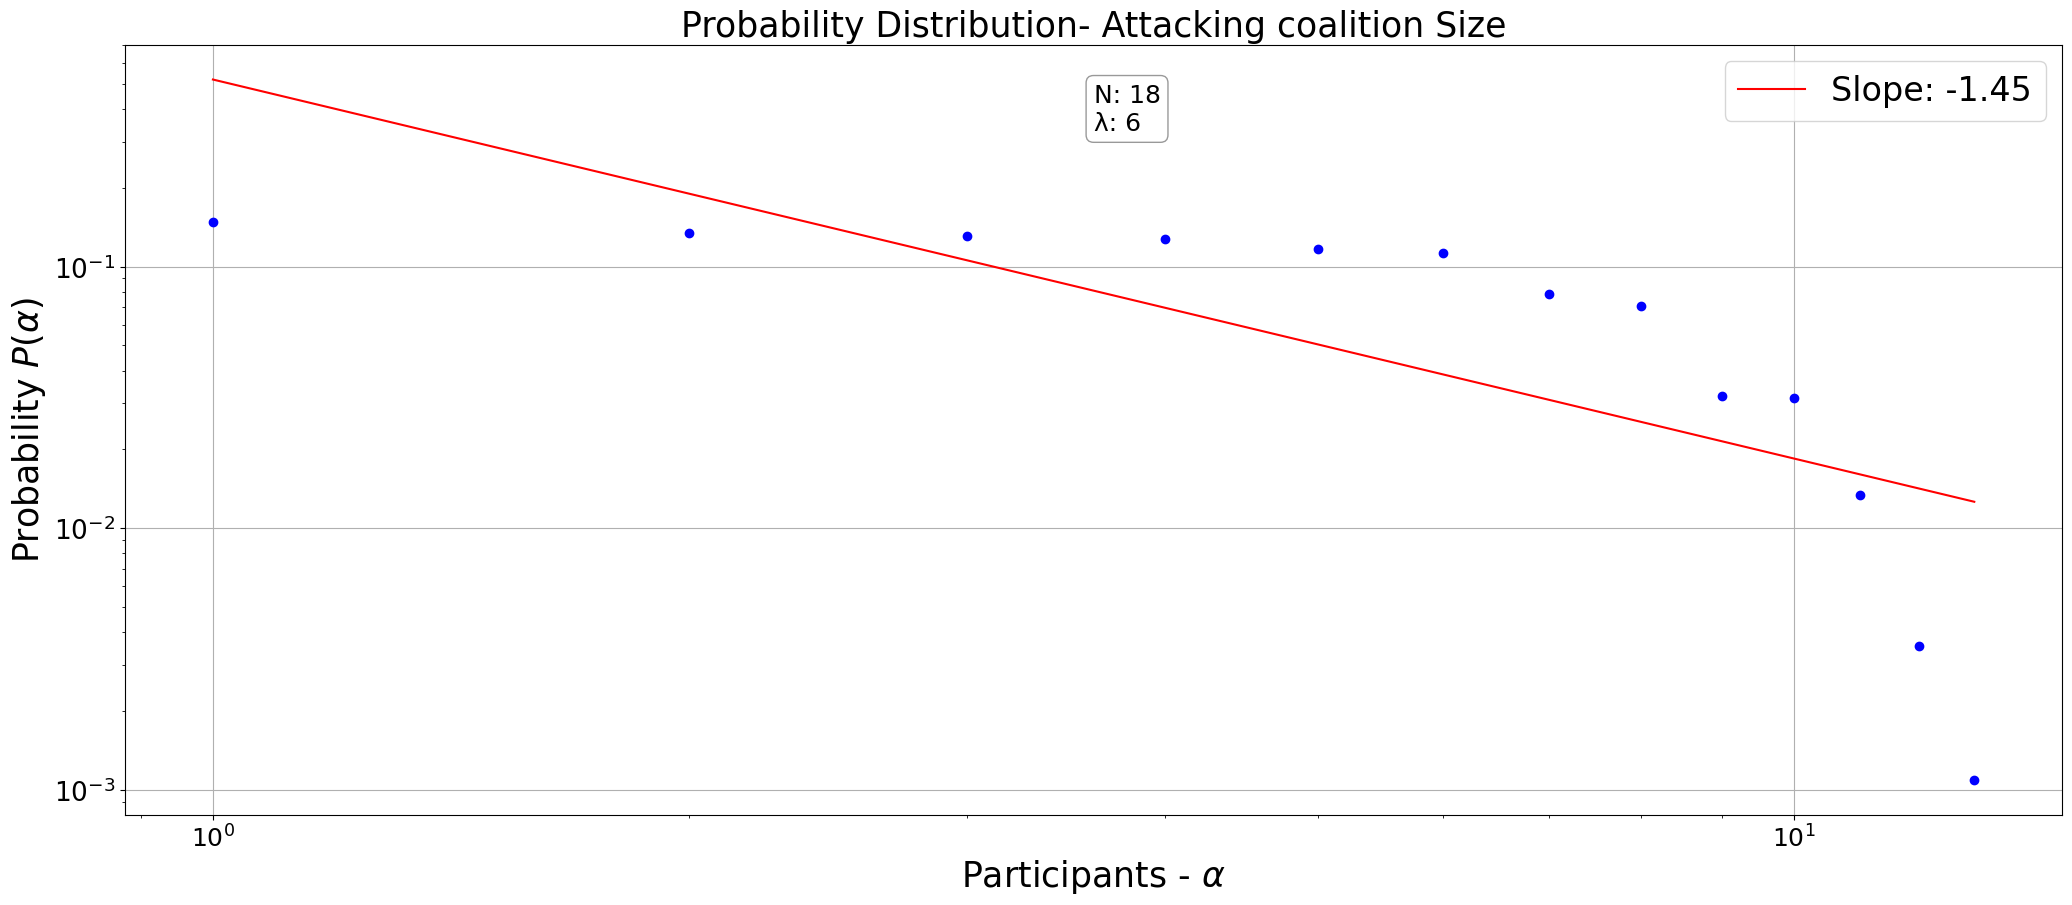

In [32]:
# Calculate the probability distribution
prob_distribution = value_counts / len(tau_values)

# Sort the values in ascending order
sorted_values = np.sort(value_counts.index)

# Increase the size of the plot
plt.figure(figsize=(25, 10), facecolor='white')  # Adjust the values (width, height) as desired


# Plot the probability distribution on a log-log scale
plt.loglog(sorted_values, prob_distribution, marker='o', linestyle='', color='blue')

# Perform log-log transformation
log_sorted_values = np.log(sorted_values)
log_prob_distribution = np.log(prob_distribution)

# Perform linear regression to estimate the slope
slope, intercept, r_value, p_value, std_err = linregress(log_sorted_values, log_prob_distribution)

# Create the line that represents the best fit
line = slope * log_sorted_values + intercept

# Plot the line on the log-log plot
plt.loglog(sorted_values, np.exp(line), color='red', label=f'Slope: {slope:.2f}')

# Increase the font size of the axis labels and tick labels
plt.xlabel(r"Participants - $\alpha$", fontsize=25)
plt.ylabel(r"Probability $P(\alpha)$", fontsize=25)
plt.title("Probability Distribution- Attacking coalition Size", fontsize=25)

# Add parameter information as a text annotation
params_info = f"N: {N}\nλ: {N//3}"
plt.text(0.5, 0.95, params_info, fontsize=18, transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.8))


# Increase the font size of the tick labels
plt.xticks(fontsize=18)
plt.yticks(fontsize=19)

plt.legend(fontsize=24)

plt.grid(True)
plt.show()


# Periods of peace

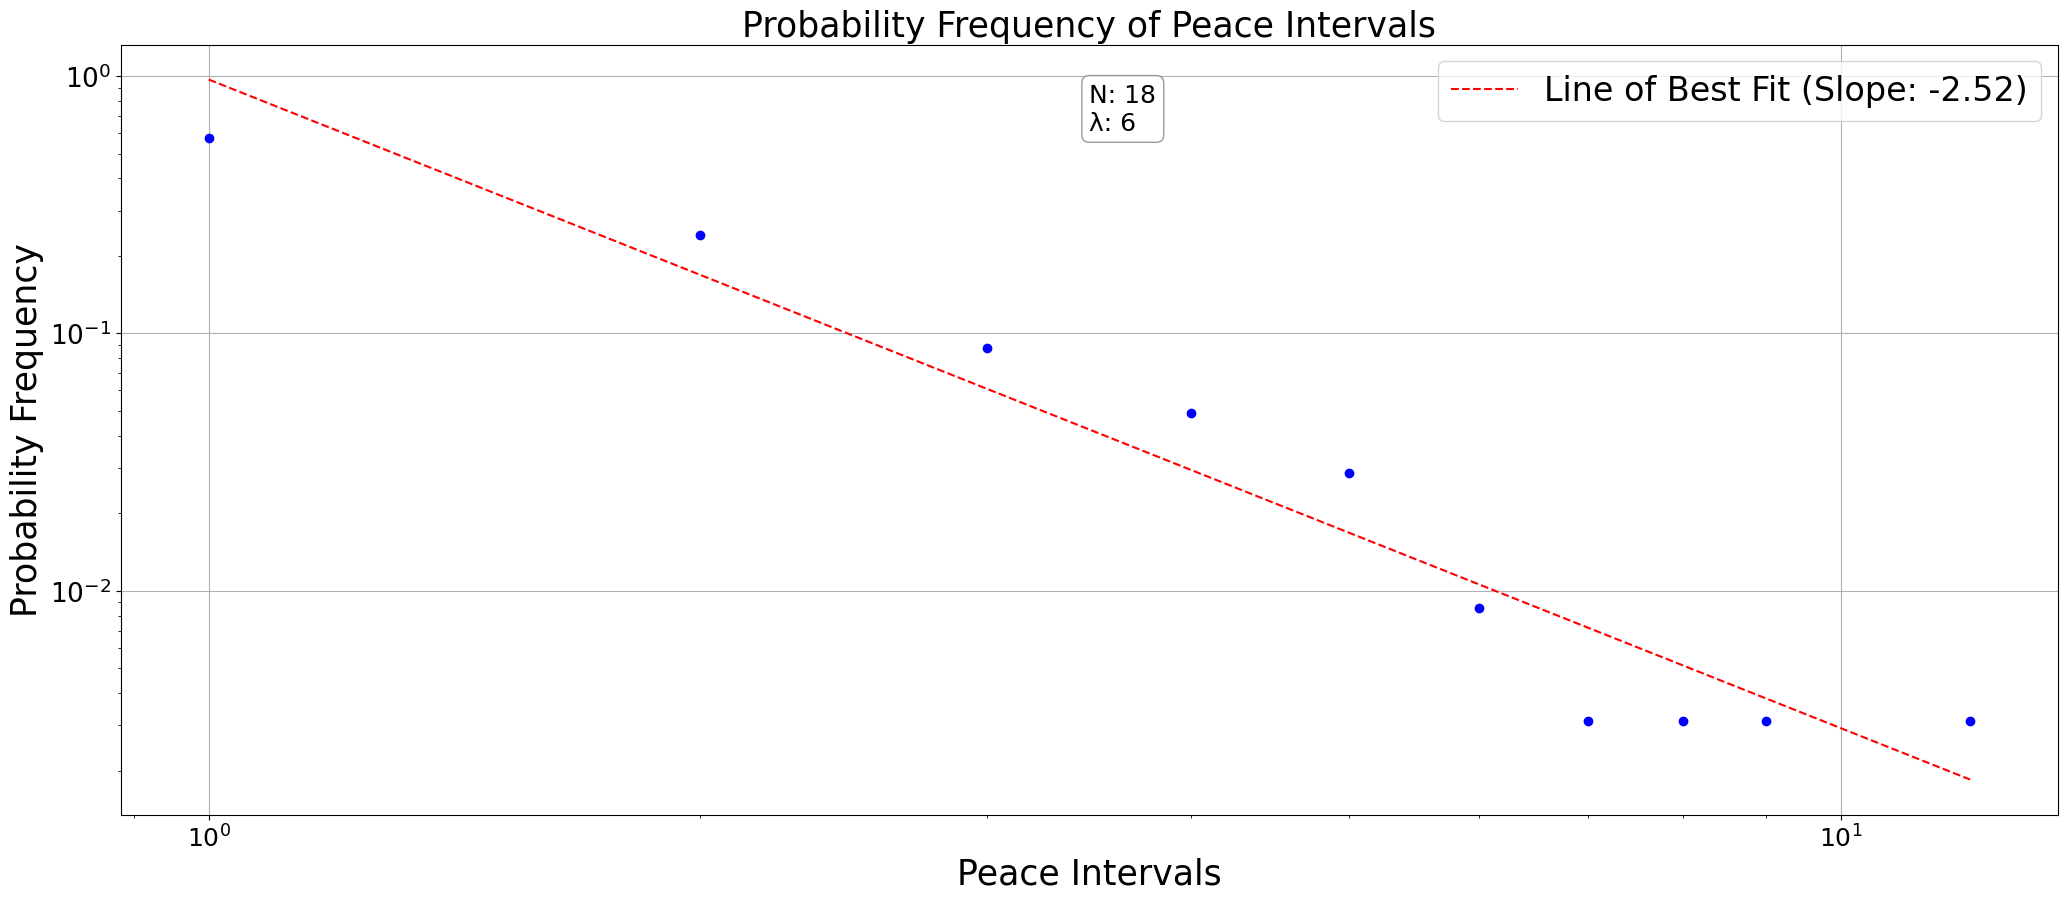

In [33]:
peace = df[df["Status"] != 1].groupby((df["Status"] == 1).cumsum()).size().tolist()

# Calculate the unique values and their respective frequencies
unique_values, frequencies = np.unique(peace, return_counts=True)

# Calculate the total number of data points
total_data_points = len(peace)

# Calculate the probability frequencies
prob_frequencies = frequencies / total_data_points

# Increase the size of the plot
plt.figure(figsize=(25, 10), facecolor='white')  # Adjust the figure size as desired

# Plot the probability frequency on a log-log scale
plt.loglog(unique_values, prob_frequencies, marker='o', linestyle='', color='blue')

# Perform linear regression to find the line that fits the data
x = np.log10(unique_values).reshape(-1, 1)
y = np.log10(prob_frequencies)
reg = LinearRegression().fit(x, y)

# Plot the line that fits the data
plt.loglog(unique_values, 10 ** reg.predict(x), color='red', linestyle='--',
           label=f"Line of Best Fit (Slope: {reg.coef_[0]:.2f})")

# Set the labels and title of the plot
plt.xlabel("Peace Intervals", fontsize=25)
plt.ylabel("Probability Frequency", fontsize=25)
plt.title("Probability Frequency of Peace Intervals", fontsize=25)

# Add parameter information as a text annotation
params_info = f"N: {N}\nλ: {N//3}"
plt.text(0.5, 0.95, params_info, fontsize=18, transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.8))

# Increase the font size of the tick labels
plt.xticks(fontsize=18)
plt.yticks(fontsize=19)

# Increase the size of the legend
plt.legend(fontsize=24)

# Show the plot
plt.grid(True)
plt.show()


# Activity

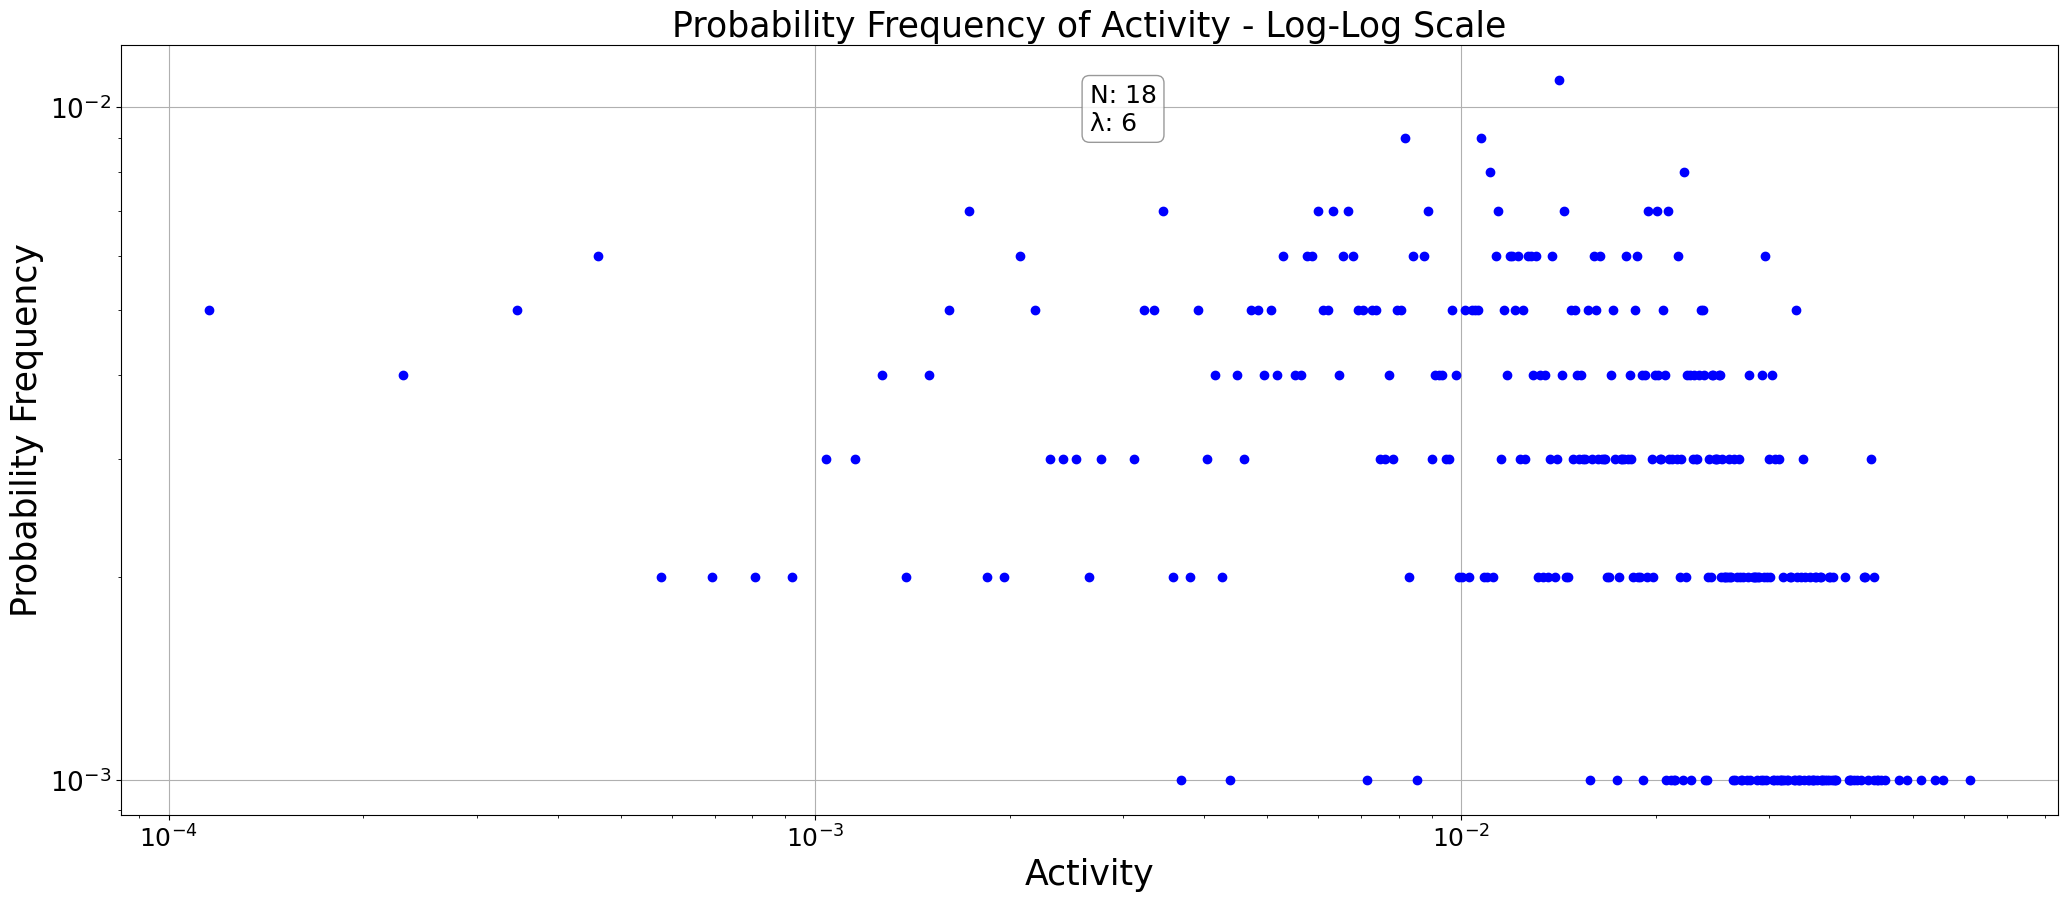

In [34]:
# Calculate the unique values and their respective frequencies
unique_values, frequencies = np.unique(df_grouped.round(8), return_counts=True)


# Calculate the total number of data points
total_data_points = len(df_grouped)

# Calculate the probability frequencies
prob_frequencies = frequencies / total_data_points

# Increase the size of the plot
plt.figure(figsize=(25, 10), facecolor='white')  # Adjust the figure size as desired

# Plot the probability frequency on a log-log scale
plt.loglog(unique_values, prob_frequencies, marker='o', linestyle='', color='blue')

# Set the labels and title of the plot
plt.xlabel("Activity", fontsize=25)
plt.ylabel("Probability Frequency", fontsize=25)
plt.title("Probability Frequency of Activity - Log-Log Scale", fontsize=25)

# Add parameter information as a text annotation
params_info = f"N: {N}\nλ: {N//3}"
plt.text(0.5, 0.95, params_info, fontsize=18, transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.8))

# Increase the font size of the tick labels
plt.xticks(fontsize=18)
plt.yticks(fontsize=19)


# Show the plot
plt.grid(True)
plt.show()


# Total loss

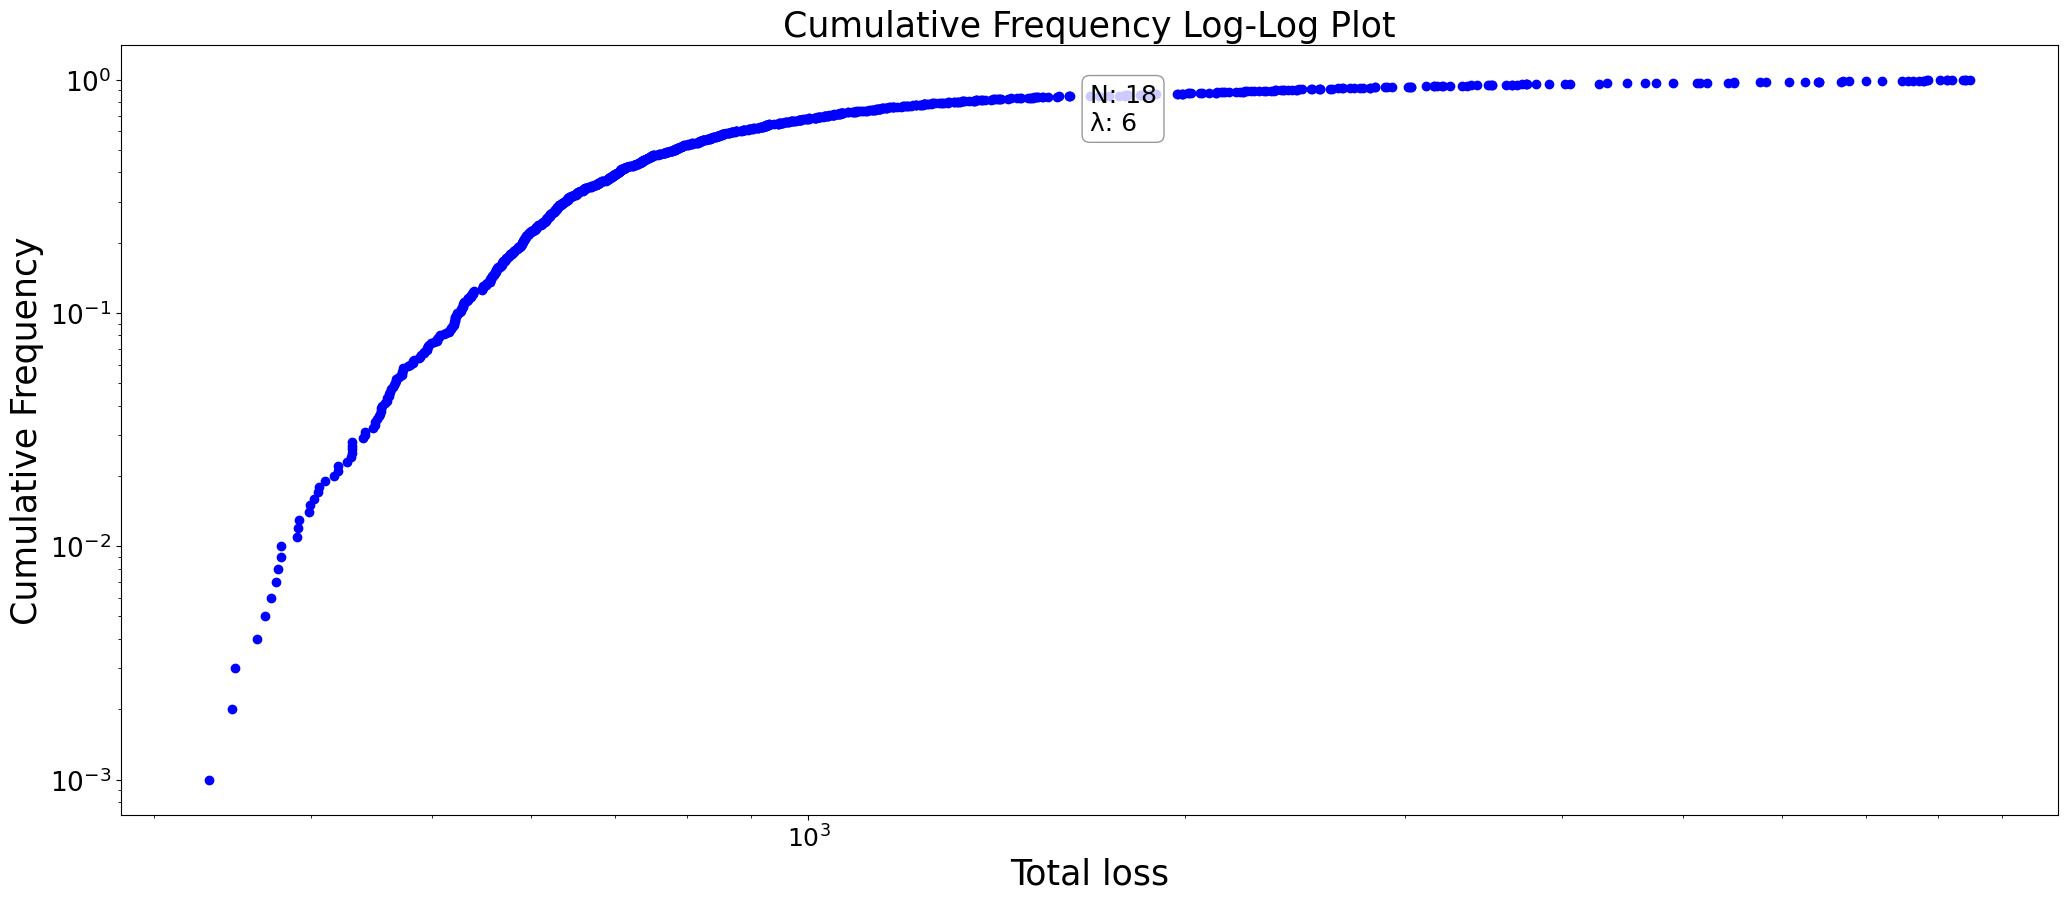

In [35]:
# Calculate the unique participants and their respective counts
participants, counts = np.unique(df_grouped2.round(3), return_counts=True)

# Sort the unique participants in ascending order
participants_sorted = np.sort(participants)

# Calculate the cumulative frequencies
cumulative_freq = np.cumsum(counts) / np.sum(counts)

# Calculate the log of participants and cumulative frequencies
log_participants = np.log10(participants_sorted)
log_cumulative_freq = np.log10(cumulative_freq)

# Increase the size of the plot
plt.figure(figsize=(25, 10),facecolor='white')  # Adjust the values (width, height) as desired

# Create the log-log plot
plt.loglog(participants_sorted, cumulative_freq, marker='o', linestyle='', color='blue')

# # Calculate the slope and intercept of the line
# slope, intercept = np.polyfit(log_participants, log_cumulative_freq, deg=1)

# # Plot the line that best fits the data
# plt.plot(participants_sorted, 10**(intercept + slope*log_participants), linestyle='--', color='red', label=f"Slope: {slope:.2f}")

# Increase the font size of the axis labels and tick labels
plt.xlabel("Total loss", fontsize=25)
plt.ylabel("Cumulative Frequency", fontsize=25)
plt.title("Cumulative Frequency Log-Log Plot", fontsize=25)

# Add parameter information as a text annotation
params_info = f"N: {N}\nλ: {N//3}"
plt.text(0.5, 0.95, params_info, fontsize=18, transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.8))


# Increase the font size of the tick labels
plt.xticks(fontsize=18)
plt.yticks(fontsize=19)

# Show the plot
plt.show()

los edges acorde a Axelrod  diferente grosor

exponente en funcion alpha en funcion en el numero de activaciones por año ver que es el alpha y ver en que influye en enumero de conflictos por año o por que no se conserva la ley de potencia.
densidad de obstaculos, densidad de obstaculos = .


incrementar el numero de vecinos paulatinamente. 
